In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab
import mlflow
from sklearn.model_selection import train_test_split


import tensorflow as tf



In [2]:
expermient_name = 'Model Tensorflow'

dict_values = {
    'mse':0,
    'r2':0,
    'rmse':0
}


def load_create_experiment():
    if mlflow.get_experiment_by_name(expermient_name):
        return mlflow.get_experiment_by_name(expermient_name)
    return mlflow.create_experiment(expermient_name)
    
current_experiment = load_create_experiment()
mlflow.set_experiment(expermient_name)

<Experiment: artifact_location='file:///C:/Users/Administrador/Desktop/DataMining/segundo_parcial/mlruns/7', creation_time=1675557850989, experiment_id='7', last_update_time=1675557850989, lifecycle_stage='active', name='Model Tensorflow', tags={}>

In [3]:
csv_clean = pd.read_csv('clean_data_def.csv')

In [4]:
csv_clean.columns

Index(['Unnamed: 0', 'age', 'ind_nuevo', 'antiguedad', 'cod_prov',
       'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1', 'sexo_binario',
       'segmento_enum'],
      dtype='object')

In [4]:
input_columns = ['age','ind_nuevo','antiguedad','cod_prov','ind_actividad_cliente', 'renta', 'sexo_binario','segmento_enum']
output_columns = ['ind_ahor_fin_ult1','ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1','ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1','ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1','ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1','ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1','ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1','ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1','ind_nom_pens_ult1', 'ind_recibo_ult1']

In [82]:
csv_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9980486.0,6.693467e+06,3.932326e+06,0.00,3.289119e+06,6572904.50,10060887.25,13647307.00
age,9980486.0,4.031680e+01,1.700122e+01,2.00,2.500000e+01,39.00,50.00,127.00
ind_nuevo,9980486.0,2.800024e-02,1.649734e-01,0.00,0.000000e+00,0.00,0.00,1.00
antiguedad,9980486.0,8.137305e+01,6.542155e+01,0.00,2.500000e+01,52.00,137.00,256.00
cod_prov,9980312.0,2.659222e+01,1.272349e+01,1.00,1.500000e+01,28.00,35.00,52.00
ind_actividad_cliente,9980486.0,4.652888e-01,4.987937e-01,0.00,0.000000e+00,0.00,1.00,1.00
renta,9980486.0,1.069254e+05,5.280691e+04,1202.73,6.624478e+04,95745.78,138507.15,255950.76
ind_ahor_fin_ult1,9980486.0,1.001955e-04,1.000927e-02,0.00,0.000000e+00,0.00,0.00,1.00
ind_aval_fin_ult1,9980486.0,2.384653e-05,4.883233e-03,0.00,0.000000e+00,0.00,0.00,1.00
ind_cco_fin_ult1,9980486.0,6.596891e-01,4.738137e-01,0.00,0.000000e+00,1.00,1.00,1.00


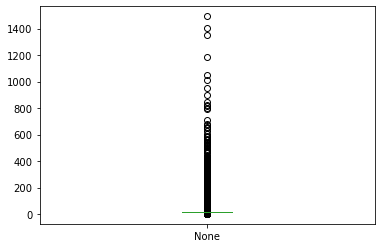

In [29]:
column_to_analize = 'renta'
img_name = column_to_analize + '_clean_without_outliers_box_plot.png'
fig = csv_clean.groupby(column_to_analize).size().plot(kind='box').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

In [5]:
csv_clean = csv_clean[csv_clean['antiguedad'] >= 0]

In [6]:
csv_clean = csv_clean[csv_clean['renta'] <= 255952]

In [7]:
csv_clean.shape

(9980486, 33)

In [8]:
inputs_from_csv = csv_clean[input_columns]
output_from_csv = csv_clean[output_columns]

<h1>Create Model</h1>

In [16]:
import keras

In [17]:
model = keras.Sequential()
#model.add(keras.Dense(16,input_dim=len(input_columns))
model.add(keras.layers.Dense(64, input_dim=len(input_columns), activation='relu'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.add(keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.Dense(4, activation='relu'))
#model.add(tf.keras.layers.Dense(4, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization((512),epsilon=1e-6,weights=None))
model.add(keras.layers.Dense(len(output_columns), activation='softmax'))
#model.add(keras.layers.Dense(5, activation='sigmoid'))
#sgd = keras.optimizers.SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True,clipnorm=0.1)
#model.compile(loss='binary_crossentropy', optimizer=sgd)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(inputs_from_csv, output_from_csv, test_size=0.33, random_state=42)

In [10]:
y_train_unidemesional = y_train.apply(lambda x: x.argmax(), axis=1).values
y_test_unidemesional = y_test.apply(lambda x: x.argmax(), axis=1).values


[0 2 0 ... 2 7 0]


[]

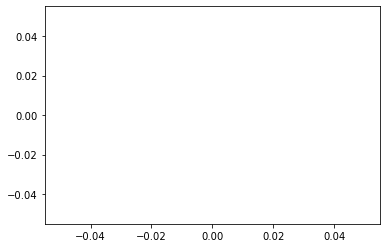

In [103]:
print(y_train_unidemesional)


In [11]:
from keras.utils import to_categorical

encoded = to_categorical(y_train_unidemesional)
print(encoded)

encondedTest = to_categorical(y_test_unidemesional)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 64)                576       
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 24)                792       
                                                                 
Total params: 3,448
Trainable params: 3,448
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(
    x=X_ros,
    y=y_ros,
    validation_data=(X_ros_test,y_ros_test),
    #batch_size=120,
    epochs=12,
    verbose='auto',
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
    shuffle=True,
    initial_epoch=0,
    steps_per_epoch=40,
    workers=1,
    use_multiprocessing=False
)


Epoch 1/12
40/40 [==============================] - 3118s 78s/step - loss: 467.7794 - accuracy: 0.0417 - val_loss: 3.1633 - val_accuracy: 0.0417
Epoch 2/12
40/40 [==============================] - 3932s 101s/step - loss: 3.1781 - accuracy: 0.0417 - val_loss: 3.1642 - val_accuracy: 0.0417
Epoch 3/12
40/40 [==============================] - 3242s 83s/step - loss: 3.1781 - accuracy: 0.0415 - val_loss: 3.1622 - val_accuracy: 0.0417
Epoch 4/12
40/40 [==============================] - 4194s 107s/step - loss: 3.1781 - accuracy: 0.0415 - val_loss: 3.1622 - val_accuracy: 0.0417
Epoch 5/12
40/40 [==============================] - 3792s 97s/step - loss: 3.1781 - accuracy: 0.0415 - val_loss: 3.1620 - val_accuracy: 0.0417


In [150]:
history = model.history

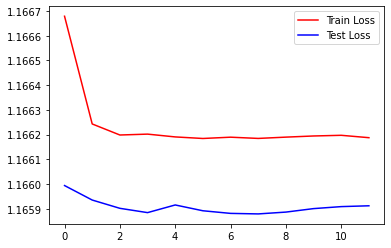

<Figure size 432x288 with 0 Axes>

In [155]:
plt.plot(range(len(history.history['loss'])), history.history['loss'], color='red', label="Train Loss")
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], color='blue',label="Test Loss")
plt.legend(loc='upper right')
plt.show()
img_name = 'loss_val_loss_con_clases_desbalanceadas'
plt.savefig(fname=img_name)

mlflow.log_artifact(img_name+'.png')

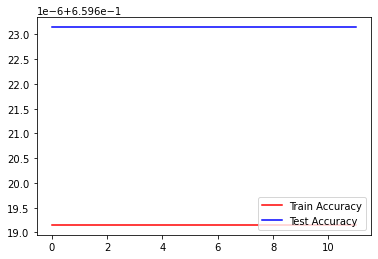

<Figure size 432x288 with 0 Axes>

In [180]:
metric='accuracy'
plt.plot(range(len(history.history[metric])), history.history[metric], color='red',label="Train Accuracy")
plt.plot(range(len(history.history['val_'+metric])), history.history['val_'+metric], color='blue',label="Test Accuracy")
plt.legend(loc="lower right")
plt.show()

img_name = 'accuracy_val_accuracy_con_clases_desbalanceadas'
plt.savefig(img_name+'.png')

mlflow.log_artifact(img_name+'.png')

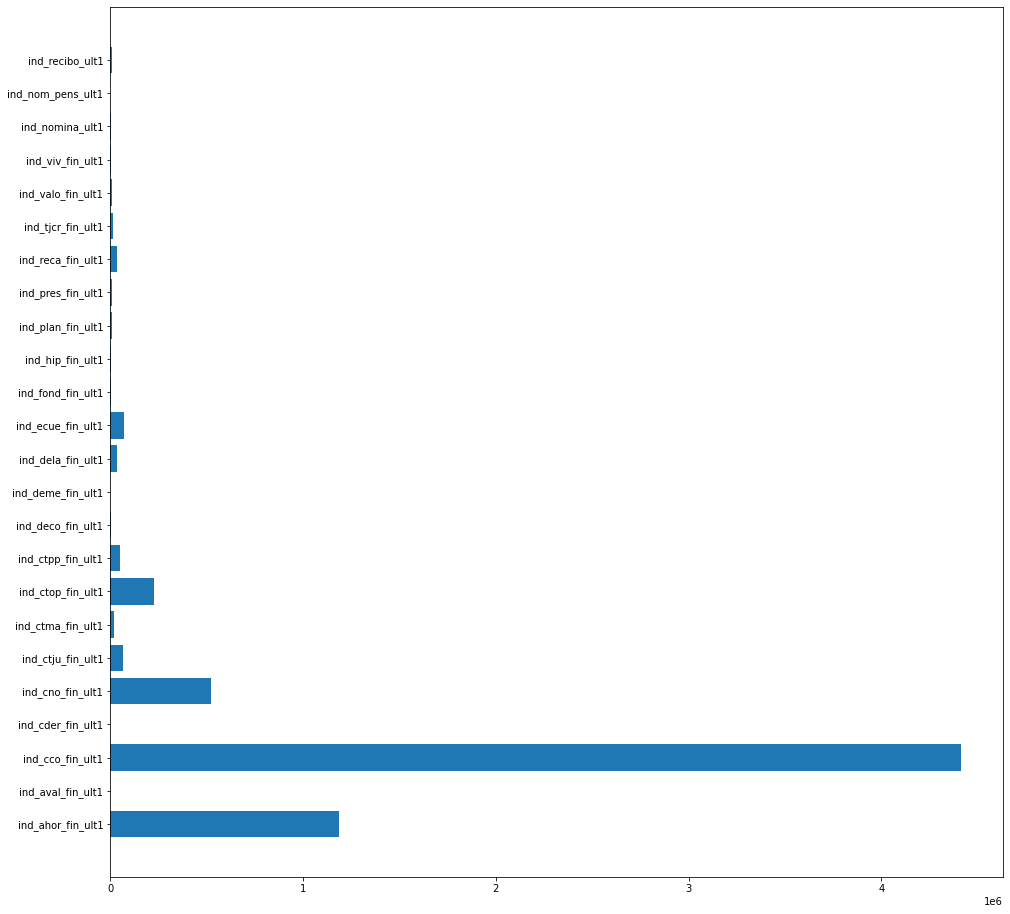

In [158]:

freq=[]
df_encoded = pd.DataFrame(encoded)
for c in output_columns:
    freq.append(df_encoded[output_columns.index(c)].value_counts()[1])

plt.figure(figsize=(16,16))
plt.barh(output_columns,freq)
plt.savefig('./i_cantidad de productos por tipo.jpg')
mlflow.log_artifact('./i_cantidad de productos por tipo.jpg')

### Balancear clases

<h1>Balanceando clases</h1>

<h3>Con under sampling</h3>

In [163]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, encoded)

x_rus_test, y_rus_test = rus.fit_resample(X_test, encondedTest)


In [176]:
mlflow.log_param('Shape RandomUnderSampler X',x_rus.shape)
mlflow.log_param('Shape RandomUnderSampler Y',y_rus.shape)


(3720, 24)

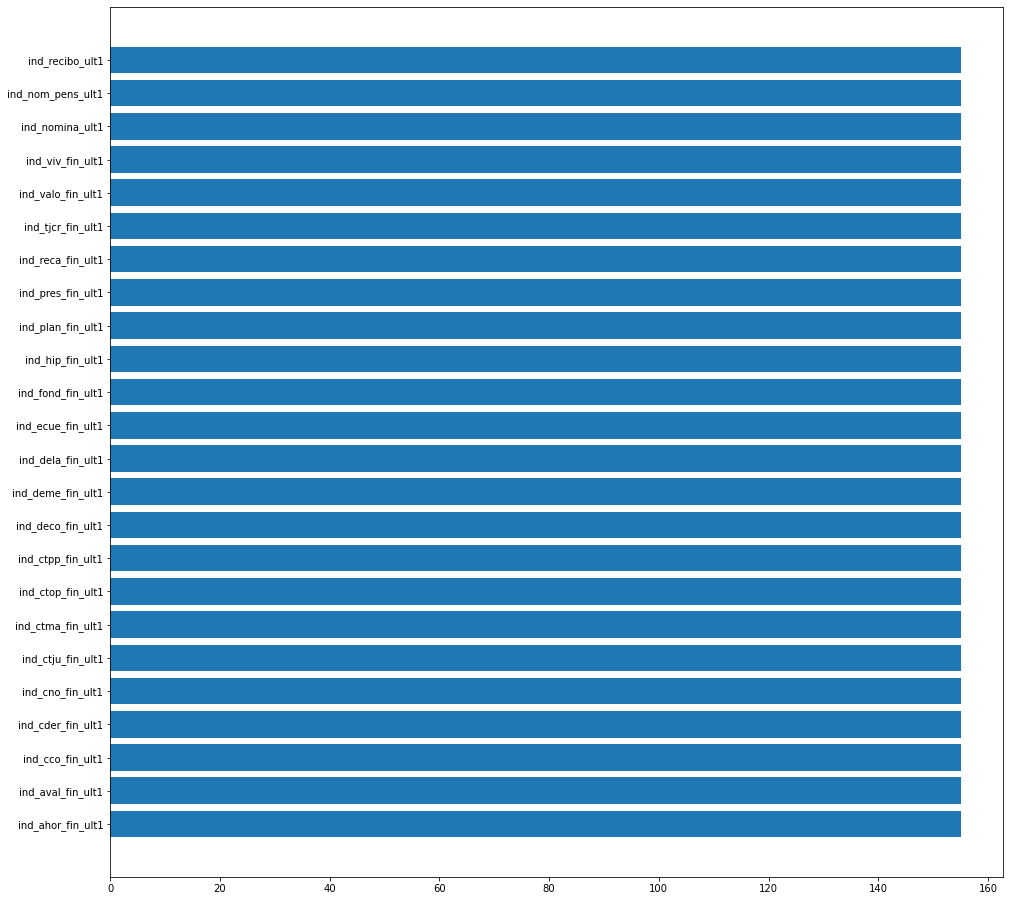

In [162]:
freq=[]
df_rus = pd.DataFrame(y_rus)
for c in output_columns:
    freq.append(df_rus[output_columns.index(c)].value_counts()[1])

plt.figure(figsize=(16,16))
plt.barh(output_columns,freq)
plt.savefig('./i_cantidad de productos por tipo balanceado RUS.jpg')
mlflow.log_artifact('./i_cantidad de productos por tipo balanceado RUS.jpg')

In [179]:
mlflow.log_artifact('model_training_UnderSample.png')

<h3>Oversample</h3>

In [12]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_ros, y_ros = ros.fit_resample(X_train, encoded)
X_ros_test, y_ros_test = ros.fit_resample(X_test, encondedTest)

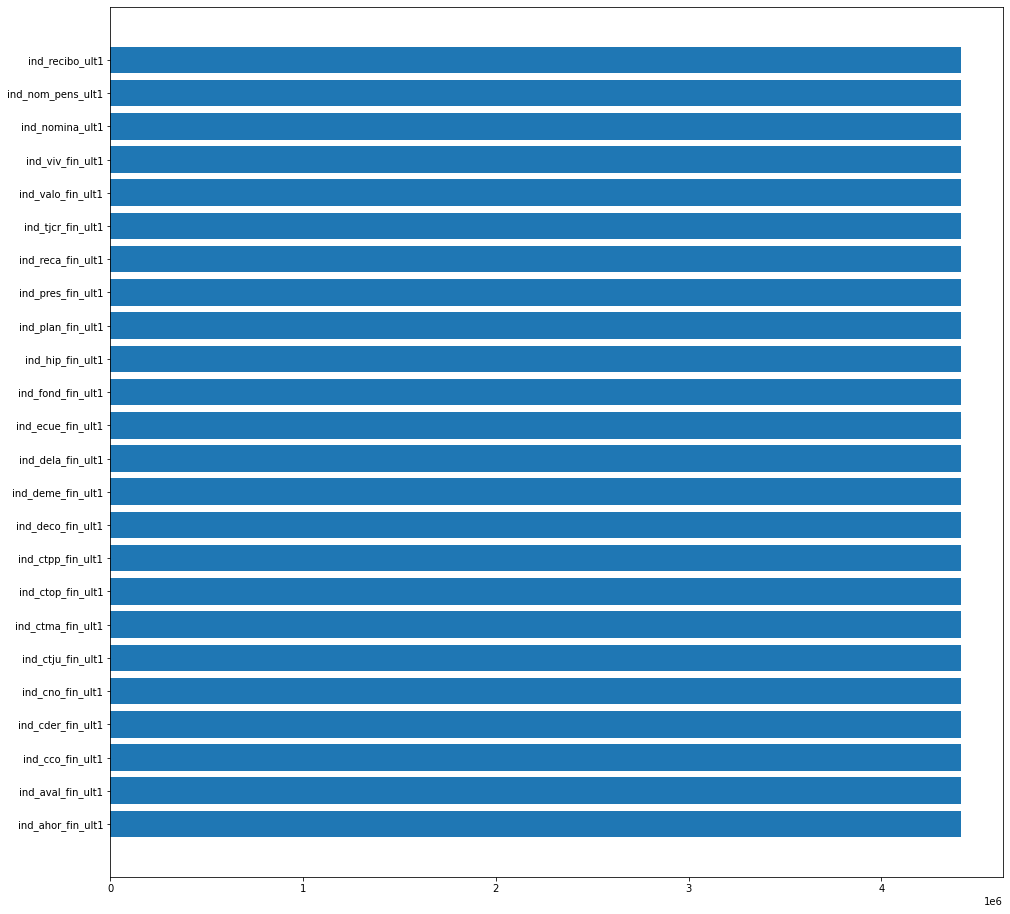

In [14]:
freq=[]
df_rus = pd.DataFrame(y_ros)
for c in output_columns:
    freq.append(df_rus[output_columns.index(c)].value_counts()[1])

plt.figure(figsize=(16,16))
plt.barh(output_columns,freq)
plt.savefig('./i_cantidad de productos por tipo balanceado ROS.jpg')
mlflow.log_artifact('./i_cantidad de productos por tipo balanceado ROS.jpg')

In [15]:
mlflow.log_param('Shape RandomOverSampler X',X_ros.shape)
mlflow.log_param('Shape RandomOverSampler Y',y_ros.shape)

(105859776, 24)

<h3> SMOTE Method</h3>

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, encoded)
X_SMOTE, y_SMOTE = sm.fit_resample(X_test, encodedTest)

In [ ]:
freq=[]
df_rus = pd.DataFrame(y_ros)
for c in output_columns:
    freq.append(df_rus[output_columns.index(c)].value_counts()[1])

plt.figure(figsize=(16,16))
plt.barh(output_columns,freq)
plt.savefig('./i_cantidad de productos por tipo balanceado SMOTE.jpg')
mlflow.log_artifact('./i_cantidad de productos por tipo balanceado SMOTE.jpg')

In [ ]:
mlflow.log_param('Shape SMOTE X',X_ros.shape)
mlflow.log_param('Shape SMOTE Y',y_ros.shape)